## Sept 24. : Clustering avec K-means        
##### Version élèves.


In [2]:
if False :
    !pip install seaborn

# Clustering K-Means avec Python

L'algo de clustering K-Means est un algorithme d’apprentissage  non supervisé, simple et très poplaire bien que pas très puissant.      
K-Means est utilisé pour rechercher des cluster (groupes)   dans l'ensemble de données (avec ou sans label).      
Ici, K-means est appliqué  pour trouver des clusters au sein de l'ensemble de données pour trouver ceux qui affichent le même type de comportement (status_type). Cette variable de comportement (status_type) représente des publications de nature différente (vidéo, photos, statuts et liens).

## Les données (Live dataset).    
https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand

Données sur la vente en directe en Thailand.     
On traite ici :    

- Exploration des données
- Conversion de données catég en num
- Feature selection
- Choix de K (algo elbow)
- K-means avec 2 clusters
- Evaluation du modèle
- Clustering avec d'autres valeurs de k


# **1. Introduction to K-Means Clustering** <a class="anchor" id="1"></a>

**Rappels** :
- apprentissage  supervisé / non supervisé  semi-supervisé / par réenforcement.     
La différence de variable cible,     
Dans non supervisé : pas de varibale cible.



**K-Means clustering** est un des algos non supervisés qui permet de trouver un nombre fixé par avace de clusters par similarité de caractéristiques.



## K-Means

![K-Means](./image1.png)

### Applications de clustering 

K-means est utilisé dans plusieurs domaines d'applications dont :


  1. Image segmentation

  2. Customer segmentation

  3. Species clustering

  4. Anomaly detection

  5. Clustering languages

### Principe de K-means :
- A base de Centroïdes
- Il s'agit d'un algorithme itératif dans lequel la notion de similarité est dérivée de la proximité d'un point de données avec le centroïde du cluster.
- Un **centroïde** est un point de données au centre d'un cluster qui représente le cluster. 
-   K-Means  utilise une procédure itérative pour fournir un résultat final. L'algorithme nécessite le nombre de clusters $k$.

L'algorithme commence par des estimations initiales des $k$ centroïdes. Puis   itère  entre deux étapes :  
1- Chaque centroïde définit l'un des clusters. Au cours de cette étape, chaque point de données est attribué à son centroïde le plus proche, basé sur la distance Euclidienne.     
Ainsi, si $c_i$ est un centroide (dans l’ensemble des centroïdes $C$ de taille $k : i \in 1..k$), alors chaque point $p$ de données est attribué au cluster représenté par $c_i$ si la distance euclidienne entre $p$ et $c_i$ est minimale (c-à-d. cette distance est plus petite que la distance entre $p$ et tout autre centroide $c_{j \neq i} $).   
2- MAJ des centroides selon les données qui constituent chaque cluster : on prend la moyenne des points $p$ attribué à chaque cluster et cette moyenne devient le nouveau centroid pour ce groupe de points.


3- L'algorithme itère ensuite entre ces 2 étapes jusqu'à ce qu'un critère d'arrêt soit rempli.      
Les critères d'arrêt signifient qu'aucun point de données ne modifie les clusters, que la somme des distances est minimisée ou qu'un  nombre maximum d'itérations (défini par avance) est atteint.    

La convergence de cet algorithme est mathématiquement garantie.     
Le résultat peut être un optimum local; ce qui signifie que l'évaluation de plusieurs exécutions de l'algorithme avec des centroïdes de départ aléatoires différents peut donner un meilleur résultat.


![K-Means](./image2.jpeg)

### Choix de la valeur de K.

Un des points faibles de K-means est la valeur de K.    
On peut améliorer ce choix avec  **la méthode Elbow** .


### La méthode  Elbow  
Cette méthode   est utilisée pour déterminer $k$ le nombre optimal de clusters dans la méthode K-means.     
Elle  trace les différentes valeur de la fonction de coût de clustering produite pour différentes valeurs de $k$ (donc avec différentes exécutions de K-means).  


![Elbow](./elbow2.png)

Dans la méthode **Elbow**, on fait varier le nombre de clusters ($K$) de 1 à 10. Pour chaque valeur de K, nous calculons **WCSS** (Within-Cluster Sum of Square) appelé également   la **distorsion**.     
WCSS est la somme de la distance au carré entre chaque point et le centre de gravité de son cluster.      
Lorsque nous traçons le WCSS avec la valeur $K$, le tracé ressemble à un coude d'où le nom (elbow).   

À mesure que le nombre de clusters augmente, la valeur WCSS commencera à diminuer. La valeur WCSS est la plus grande lorsque K = 1. On peut constater (rapidement)   que la courbe graphique fera un changement rapide (une déviation) en un point, créant ainsi une forme de coude. 

À partir de ce point, le graphique se déplace (souvent) presque parallèlement à l’axe X.  

La valeur $K$ correspondant à ce point est la valeur optimale de $K$ donnant un nombre optimal de clusters.  

Nous pouvons constater que si $K$ augmente, la distorsion moyenne diminuera. Chaque cluster aura alors moins d’instances constitutives et les instances seront plus proches de leurs centroïdes respectifs.      
Ainsi, les améliorations de la distorsion moyenne diminueront à mesure que $K$ (= le nombre de clsuters) augmente. La valeur de $K$ pour laquelle l'amélioration de la distorsion diminue le plus (avant d'arrêter de diminuer significativement) est appelée le coude.      
A ce stade, nous avons une valeur optimale de$k$ pour notre clustering et nous pouvons arrêter de diviser les données en des groupes supplémentaires (d'augmenter $k$), même si nous comptons appliquer une autre méthode de clustering pour laquelle nous avons besoin de fournir un $k$ (p. ex. une méthode de clustering divisive) .

Vue alternative de Elbow à base de la **variance**.

![Elbow](./elbow.png)

### Importation des données


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline


In [3]:
# Si importantion plus large !
if False :
    import os
    for dirname, _, filenames in os.walk('/folder/data'):
        for filename in filenames:
            print(os.path.join(dirname, filename))

#### Ignorer les warnings


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = './Live.csv'

df = pd.read_csv(data)


### Exploration des données


#### dimensions

In [6]:
df.shape

(7050, 16)

In [7]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

### Check les valeurs manquantes

In [126]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

Il y a 4 dernières colonnes ne nous seront pas utiles, que l'on va écarter.

#### Drop les colonnes inutiles du dataset (data frame)

In [10]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB



Il nous reste  3  variables catégorielles (data type = object) et 9 numeriques (data type = int64).


#### QQ stats sur les numériques

In [12]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


On va explorer les vars énumérées (catégorielles).


#### La variable`status_id` 

In [13]:
# les  labels uniques  de cette variable

df['status_id'].unique()

array(['246675545449582_1649696485147474',
       '246675545449582_1649426988507757',
       '246675545449582_1648730588577397', ...,
       '1050855161656896_1060126464063099',
       '1050855161656896_1058663487542730',
       '1050855161656896_1050858841656528'], dtype=object)

In [15]:
# Combien de valeurs  differente 
len(df['status_id'].unique())

6997

### NB : il faura supprimer les variables à valeurs uniques dans un dataset (attributs "branchants").

 6997  labels uniques pour `status_id`.     
 Le nombre total dans dataset est  7050.       
 Donc il y a approximativement une valeur unique pour chaque.    
 De plus cette variable ne nous est pas utile ! On l'enlèvera plus loin.


#### Même exploration pour  la variable  `status_published` 

In [16]:

df['status_published'].unique()

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
      dtype=object)

In [17]:

len(df['status_published'].unique())

6913

Même remarque.

#### explotation de `status_type`  

In [18]:

df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [19]:

len(df['status_type'].unique())

4

Il y a 4 labels différentes; On conserve la variable `status_type` .

#### Suppression (par drop) de `status_id` et de  `status_published`

In [20]:
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

#### Infos sur la nouveau dataset 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


#### QQ instances (les premiers)

In [22]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


Il nous reste une variable  non-numerique   `status_type`.   
On la convertit en numérique.


### Définitions des vars et le label.

In [23]:
X = df
y = df['status_type']

#### Conversion de la variable catégorielle par label encoder
#### voir aussi les possibilités avec dummies (de pandas)


In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# On apprend sur X['status_type'] et on transforme sur y (par y = le.transform(y))
X['status_type'] = le.fit_transform(X['status_type'])

y = le.transform(y)

#### Pour l'instant, la colonne y (décision) n'est pas utile pour clutering.

#### QQ infos

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int64
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int64(10)
memory usage: 550.9 KB


In [139]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


#### On constate bien que le colonne 'status_type' est numérique.

# Normalisation (mise à l'Echelle).
Les valeurs ramenés entre 0 et 1.    
Cette   transformation est souvent utilisée alternativement à la normalisation (zero mean, unit variance scaling).


### ZZZ : si on fait un clustering sans normalisation, avec k=2, on aura une accuracy de seulement 1% !!

In [28]:
cols = X.columns

In [29]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [30]:
X = pd.DataFrame(X, columns=[cols])

In [31]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


###  Modèle K-Meansavec 2 clusters

In [32]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

### Paramètre du modèle


In [34]:
kmeans.cluster_centers_

array([[9.54921576e-01, 6.46330441e-02, 2.67028654e-02, 2.93171709e-02,
        5.71231462e-02, 4.71007076e-02, 8.18581889e-03, 9.65207685e-03,
        8.04219428e-03, 7.19501847e-03],
       [3.28506857e-01, 3.90710874e-02, 7.54854864e-04, 7.53667113e-04,
        3.85438884e-02, 2.17448568e-03, 2.43721364e-03, 1.20039760e-03,
        2.75348016e-03, 1.45313276e-03]])

L'algorithme **K-Means** regroupe les données en essayant de séparer les échantillons en $k$ groupes (ici, $k=2$) de variances égales, en minimisant un critère **d'inertie** (ou *distorsion* : somme des carrés des distances au sein du cluster).  
        
L'inertie est  une mesure de la cohérence interne des clusters.

L'algorithme k-means divise un ensemble de $N$ échantillons $X$ en $K$ clusters disjoints (ensemble $C$ de cluster $C_i$), chacun décrit par la moyenne des échantillons du cluster. Les moyennes sont  appelées les  **centroïdes** de cluster.

L'algorithme K-means vise à choisir des centroïdes qui minimisent l'inertie.

##### Le critère  "Inertia" (inertie)


- **Inertia** n'est pas une métrique normalisé. 

- Les valeurs **les plus faibles sont meilleures**, Zéro est **l'optimal** !
 

- Dans un espace de haute dimension, les distances euclidiennes ont tendance à gonfler (c’est un exemple de « malédiction de la dimensionnalité »).

- L'exécution d'un algorithme de réduction de dimensionnalité tel que PCA avant le clustering k-means peut atténuer ce problème et accélérer les calculs.


- On peut obtenir l'interie du modèle comme ceci :


In [35]:
kmeans.inertia_

237.7572640441955

- Rappel : <font color="red"> plus l'inertie est faible, meilleur est le modèle.</font>

- Notre modèle a une inertie élevée. Ce n'est donc pas un bon modèle !


### Vérification de la qualité du modèle 

In [36]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Résultat: %d de  %d cas sont correctement labélisés." % (correct_labels, y.size))


Résultat: 4288 de  7050 cas sont correctement labélisés.


In [37]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.61


<font color="red"> **C'est donc un clustering faible (weak).**</font>

#### Utilisation de la méthode elbow pour trouver le bon nombre de cluters.


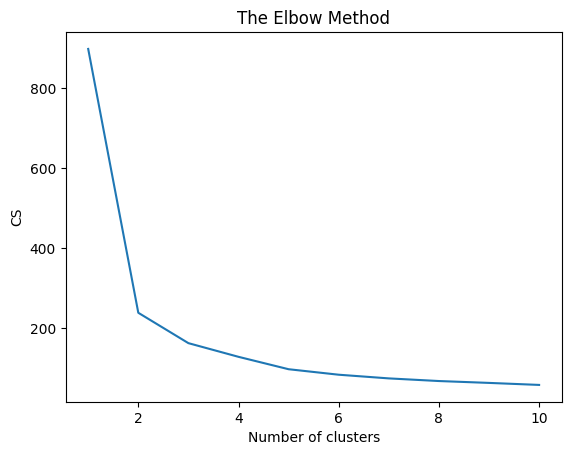

In [38]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()


- D'après le tracé ci-dessus, nous pouvons voir qu'il y a un pli à k=2.

- Par conséquent, k=2 peut être considéré comme un bon nombre de cluster pour regrouper ces données.

- Mais nous avons vu qu'on atteint une faible précision de classification avec k=2.

- Le code pour  k=2 pour pouvoir ensuite modifier k  

In [39]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4288 out of 7050 samples were correctly labeled.
Accuracy score: 0.61


#### Essayons d'autres valeurs de k.

###  K-Means avec un k différent


#### K-Means avec  3 clusters

In [40]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4066 out of 7050 samples were correctly labeled.
Accuracy score: 0.58


In [41]:
kmeans.inertia_

178.66340039279422

L'inertie a baissée mais l'accuracy aussi !

#### K-Means  avec 4 clusters

In [44]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4112 out of 7050 samples were correctly labeled.
Accuracy score: 0.58


In [159]:
kmeans.inertia_

127.31833323924263

L'inertie a baissée mais l'accuracy aussi !    
On a un score (accuracy) de  of 58%  avec k=4 (cela dépend des exécutions car il y a une part random dans K-means).

### Conclusion : la méthode k-means n'est pas adaptée pour ces données
### <font color="red"> Exercice : essayer d'autres méthodes de clustering.</font>  
Voir ci-dessous (exercice).


#### QQ  References 
  1. Udemy course – Machine Learning – A Z by Kirill Eremenko and Hadelin de Ponteves

  2. https://en.wikipedia.org/wiki/K-means_clustering

  3. https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

  4. https://www.datacamp.com/community/tutorials/k-means-clustering-python

  5. https://www.datascience.com/blog/k-means-clustering

  6. https://acadgild.com/blog/k-means-clustering-algorithm



# Exercice :
Procéder à dautre types de clustering (DBSCAN, EM, hiérarchique, ...)